A better example than the biased Casino,

You are getting action recommendations from an API (or another team) that you do not trust (or who were optimising to a different goal) but they have access to a variables that you do not. 

In [1]:
from causalpy.bandits import DiscreteContextualEnviroment,ThompsonSampling,DiscreteContextualBandit


In [2]:
# take the setup Elias uses
# generate a range of different scenarios
# use a corral bandit version that interpolates between
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

E[y1|X, B, D] B = 0 B = 1 B = 0 B = 1
X = 0 *0.20 0.30 0.50 0.60
X = 1 0.60 *0.20 0.30 0.50
X = 2 0.50 0.60 *0.20 0.30
X = 3 0.30 0.50 0.60 *0.20
(b) E[y1|X] E[y1|do(X)]
X = 0 0.20 0.40
X = 1 0.20 0.40
X = 2 0.20 0.40
X = 3 0.20 0.40

In [14]:
T = 1500
num_actions = 15
num_contexts = 4
model = DiscreteContextualEnviroment.create_uninformative_context(num_contexts,num_actions,epsilon=0.4)

alg2 = DiscreteContextualBandit(num_contexts,ThompsonSampling)
alg2.run(T,model)

alg1 = ThompsonSampling()
alg1.run(T,model)

0.0

In [15]:
simulations = 1000
result = np.zeros((simulations,T,2))
for s in range(simulations):
    alg1 = ThompsonSampling()
    alg2 = DiscreteContextualBandit(num_contexts,ThompsonSampling)
    alg1.run(T,model)
    alg2.run(T,model)
    optimal_reward = model.best_reward()[alg2.contexts]
    result[s,:,0] = optimal_reward - alg1.expected_reward(model)
    result[s,:,1] = alg2.expected_regret(model)
    

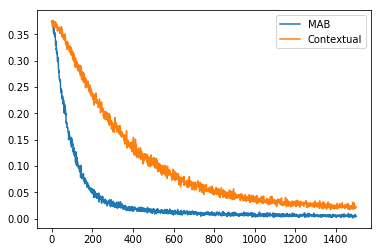

In [16]:
plt.plot(result[:,:,0].mean(axis=0),label="MAB")
plt.plot(result[:,:,1].mean(axis=0),label="Contextual")
plt.legend(loc="upper right")